In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

26.017476305263813 -139.75657650514825
-89.40397018096583 -73.54605209264996
-10.801520311993443 -176.4555587039102
-64.14183573780045 -104.73511192848449
-23.425776528804363 75.07966048966111
-62.73685981347994 97.91445740493424
82.76463301025464 -93.07429725582367
51.71321051310241 147.28220286788428
48.531594592310796 -105.85564463490341
51.41048965524365 -31.46516023561452
68.29183492210575 13.923120751865468
62.11653513863044 -65.896278284152
80.83646578121045 82.67467969241824
-22.651477434806992 94.84388037149239
18.01816792548003 -21.8580042524587
84.15460158411145 145.78306375288372
-8.41863571824878 69.61508248326129
-44.60816893363747 -20.18721865112559
-76.29229546294991 -91.23742276399052
-38.92818738935486 114.72288942533805
61.465193930739275 -168.49717469709302
12.155919584328117 -83.78955160576534
20.14053692332081 5.2061054120235895
-9.726205975321847 179.34308790261127
45.46457080448178 -103.39652206753219
26.445896815368187 -148.00663059104056
-50.735892333073295 13

In [14]:
from citipy import citipy


In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b285451e467c16fb781b092c73f8e73


In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | assiniboia
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | stamsund
City not found. Skipping...
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | santa maria
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 |

Processing Record 38 of Set 4 | filadelfia
Processing Record 39 of Set 4 | verkhneuralsk
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | santa barbara
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | taonan
Processing Record 44 of Set 4 | divo
Processing Record 45 of Set 4 | svetlyy
Processing Record 46 of Set 4 | kayerkan
Processing Record 47 of Set 4 | burica
City not found. Skipping...
Processing Record 48 of Set 4 | siemiatycze
Processing Record 49 of Set 4 | sotouboua
Processing Record 50 of Set 4 | maumelle
Processing Record 1 of Set 5 | mazyr
Processing Record 2 of Set 5 | meulaboh
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | loikaw
Processing Record 5 of Set 5 | sinkat
City not found. Skipping...
Processing Record 6 of Set 5 | tateyama
Processing Record 7 of Set 5 | moose factory
Processing Record 8 of Set 5 | muroto
Processing Record 9 of Set 5 | puerto del rosario
Processing Record 10 of Set 5 | w

Processing Record 31 of Set 8 | pachuquilla
Processing Record 32 of Set 8 | juneau
Processing Record 33 of Set 8 | antalya
Processing Record 34 of Set 8 | yanam
Processing Record 35 of Set 8 | oussouye
Processing Record 36 of Set 8 | panaba
Processing Record 37 of Set 8 | hargeysa
Processing Record 38 of Set 8 | pafos
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | paranaiba
Processing Record 41 of Set 8 | dustlik
Processing Record 42 of Set 8 | nushki
Processing Record 43 of Set 8 | taltal
Processing Record 44 of Set 8 | salta
Processing Record 45 of Set 8 | puerto maldonado
Processing Record 46 of Set 8 | vila franca do campo
Processing Record 47 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 48 of Set 8 | samarai
Processing Record 49 of Set 8 | bafoulabe
Processing Record 50 of Set 8 | cherskiy
Processing Record 1 of Set 9 | kalyazin
Processing Record 2 of Set 9 | razole
Processing Record 3 of Set 9 | atar
Processing Record 4 of

City not found. Skipping...
Processing Record 23 of Set 12 | makat
Processing Record 24 of Set 12 | chake chake
Processing Record 25 of Set 12 | merauke
Processing Record 26 of Set 12 | plettenberg bay
Processing Record 27 of Set 12 | nabire
Processing Record 28 of Set 12 | portland
Processing Record 29 of Set 12 | san quintin
Processing Record 30 of Set 12 | tilhar
Processing Record 31 of Set 12 | trincomalee
Processing Record 32 of Set 12 | komyshuvakha
Processing Record 33 of Set 12 | clarence town
Processing Record 34 of Set 12 | palo alto
Processing Record 35 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 36 of Set 12 | zorgo
Processing Record 37 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 38 of Set 12 | hornepayne
Processing Record 39 of Set 12 | phuket
Processing Record 40 of Set 12 | shenzhen
Processing Record 41 of Set 12 | te anau
Processing Record 42 of Set 12 | poya
Processing Record 43 of Set 12 | socorro
Processing Record 44 o

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,79.29,89,100,12.66,US,2022-12-07 22:52:28
1,Ushuaia,-54.8000,-68.3000,47.86,49,40,24.16,AR,2022-12-07 22:52:52
2,Punta Arenas,-53.1500,-70.9167,48.31,53,0,17.27,CL,2022-12-07 22:52:45
3,Busselton,-33.6500,115.3333,62.58,72,53,6.29,AU,2022-12-07 22:52:53
4,Qaanaaq,77.4840,-69.3632,11.97,67,83,8.41,GL,2022-12-07 22:52:53
5,Vostok,46.4856,135.8833,-4.50,99,97,4.70,RU,2022-12-07 22:52:54
6,Assiniboia,49.6334,-105.9845,10.22,67,6,14.97,CA,2022-12-07 22:52:54
7,Lagoa,39.0500,-27.9833,60.69,77,20,15.66,PT,2022-12-07 22:52:55
8,Iqaluit,63.7506,-68.5145,13.73,78,100,16.11,CA,2022-12-07 22:52:55
9,Dikson,73.5069,80.5464,-14.15,96,94,18.07,RU,2022-12-07 22:52:56


In [20]:
new_column_order = ["column2", "column4", "column1"]
df = city_data_df[new_column_order]
df

KeyError: "None of [Index(['column2', 'column4', 'column1'], dtype='object')] are in the [columns]"

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

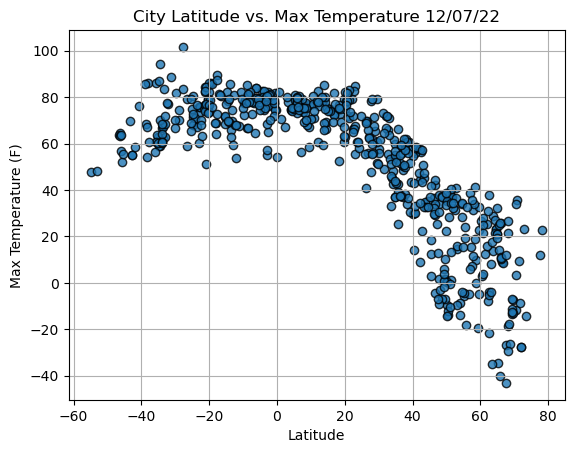

In [24]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")


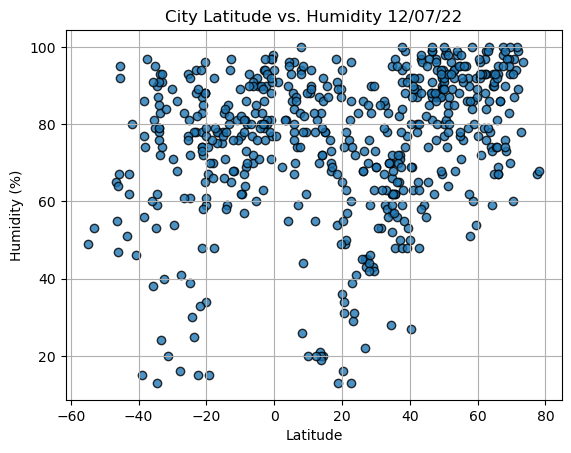

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")

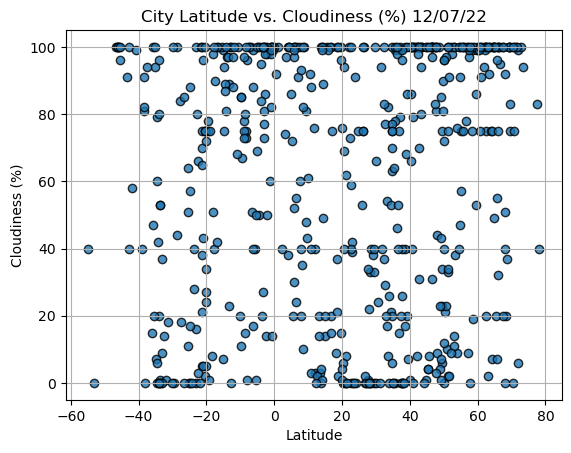

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

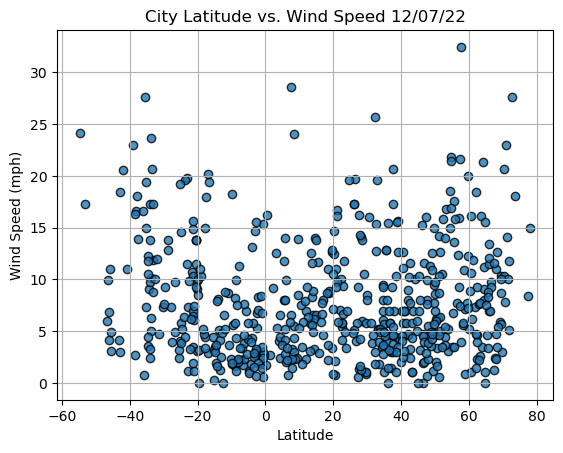

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,79.29,89,100,12.66,US,2022-12-07 22:52:28
4,Qaanaaq,77.4840,-69.3632,11.97,67,83,8.41,GL,2022-12-07 22:52:53
5,Vostok,46.4856,135.8833,-4.50,99,97,4.70,RU,2022-12-07 22:52:54
6,Assiniboia,49.6334,-105.9845,10.22,67,6,14.97,CA,2022-12-07 22:52:54
7,Lagoa,39.0500,-27.9833,60.69,77,20,15.66,PT,2022-12-07 22:52:55


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

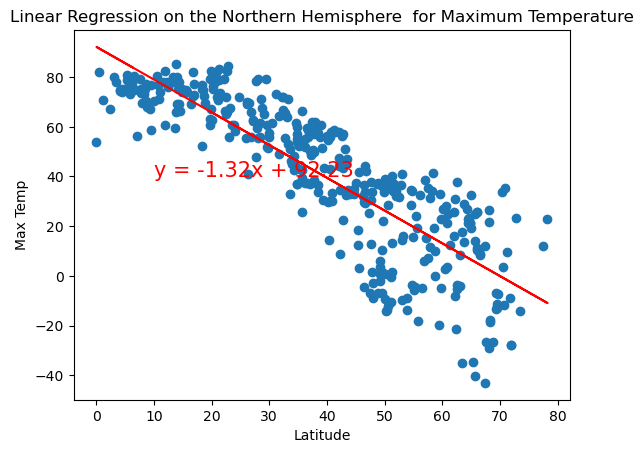

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
 for Maximum Temperature', 'Max Temp',(10,40))

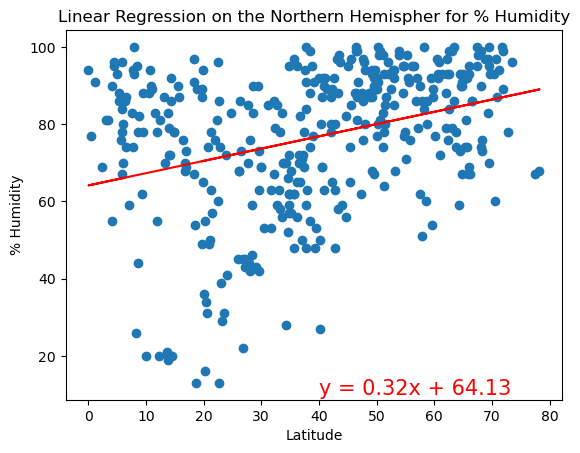

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispher\
 for % Humidity', '% Humidity',(40,10))

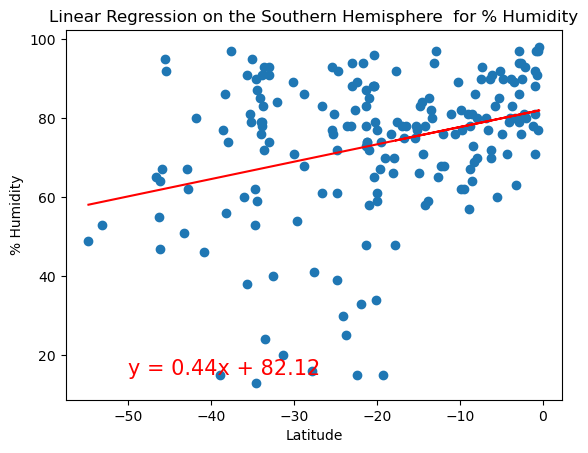

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
 for % Humidity', '% Humidity',(-50,15))

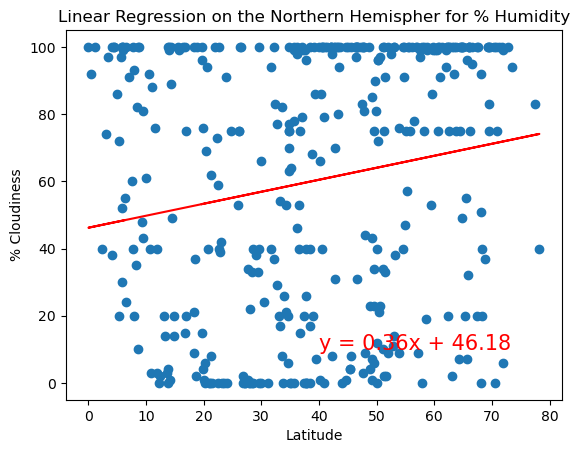

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispher\
 for % Humidity', '% Cloudiness',(40,10))

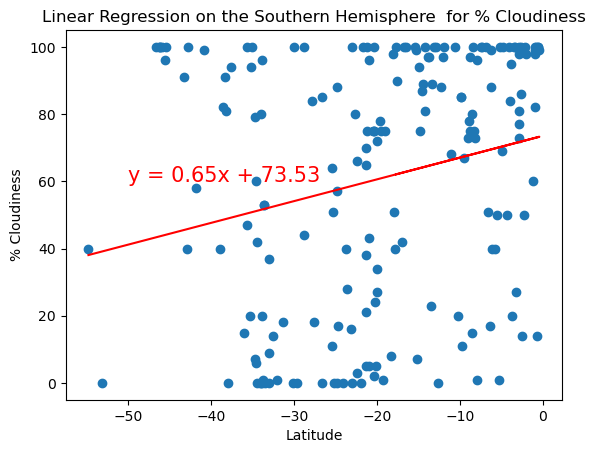

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
 for % Cloudiness', '% Cloudiness',(-50,60))

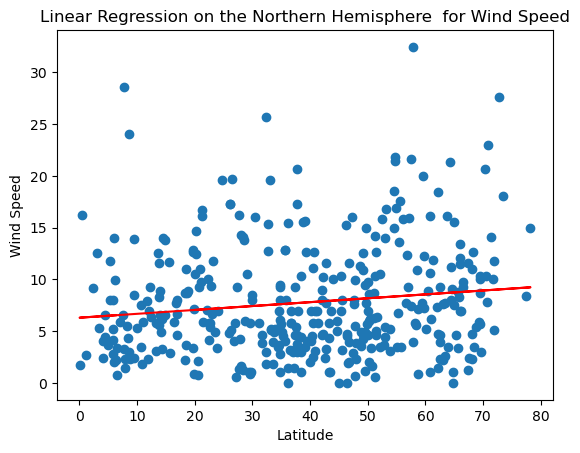

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
 for Wind Speed', 'Wind Speed',(40,35))

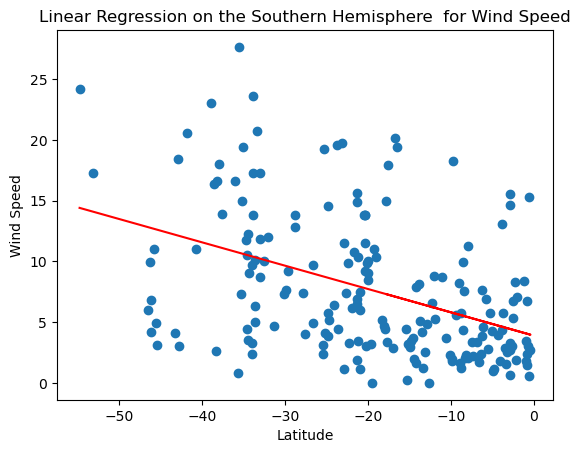

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
 for Wind Speed', 'Wind Speed',(-50,35))